# 🌳 Tree Census in New York City

## Geospatial Analysis with GeoPandas

**Datasets source: [Kaggle](https://www.kaggle.com/datasets/nycparks/tree-census/data)**

**Incorporate geographic context into the analysis by converting tabular data into spatial data using GeoPandas**

### Import Python libraries

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

### Load data

In [ ]:
data = {
    1995: "1995_trees.csv",
    2005: "2005_trees.csv",
    2015: "2015_trees.csv",
}

df95 = pd.read_csv(data[1995])
df05 = pd.read_csv(data[2005])
df15 = pd.read_csv(data[2015])

### Check if the data in `latitude` and `longitude` columns in datasets is correct

In [ ]:
np.nanmin(df95[['latitude', 'longitude']].values, axis=0), \
np.nanmax(df95[['latitude', 'longitude']].values, axis=0),

(array([ 40.496905, -74.254757]), array([ 40.911965, -73.700278]))

In [ ]:
np.nanmin(df05[['latitude', 'longitude']].values, axis=0), \
np.nanmax(df05[['latitude', 'longitude']].values, axis=0),

(array([ 40.56385023, -74.04081094]), array([ 40.91257152, -73.70071892]))

In [ ]:
np.nanmin(df15[['latitude', 'longitude']].values, axis=0), \
np.nanmax(df15[['latitude', 'longitude']].values, axis=0)

(array([ 40.49846614, -74.2549647 ]), array([ 40.91291831, -73.70048817]))

In [ ]:
df95[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456771 entries, 0 to 456770
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   456771 non-null  float64
 1   longitude  456771 non-null  float64
dtypes: float64(2)
memory usage: 7.0 MB


In [ ]:
df05[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471754 entries, 0 to 471753
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   471754 non-null  float64
 1   longitude  471754 non-null  float64
dtypes: float64(2)
memory usage: 7.2 MB


In [ ]:
df15[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652166 entries, 0 to 652165
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   652166 non-null  float64
 1   longitude  652166 non-null  float64
dtypes: float64(2)
memory usage: 10.0 MB


### Create GeoDataFrame for each dataset

In [ ]:
gdf95 = gpd.GeoDataFrame(
    df95, 
    geometry=gpd.points_from_xy(df95.longitude, df95.latitude),
    crs="EPSG:4326"
)

gdf05 = gpd.GeoDataFrame(
    df05, 
    geometry=gpd.points_from_xy(df05.longitude, df05.latitude),
    crs="EPSG:4326"
)

gdf15 = gpd.GeoDataFrame(
    df15,
    geometry=gpd.points_from_xy(df15.longitude, df15.latitude),
    crs="EPSG:4326"
)

### Save GeoDataFrames to GeoPackage (GPKG) files

In [ ]:
gdf95.to_file("1995_trees_geo.gpkg", layer="1995_trees", driver="GPKG")
gdf05.to_file("2005_trees_geo.gpkg", layer="2005_trees", driver="GPKG")
gdf15.to_file("2015_trees_geo.gpkg", layer="2015_trees", driver="GPKG")

### Load data from .gpkg files

In [ ]:
gdf95 = gpd.read_file("1995_trees_geo.gpkg")
gdf05 = gpd.read_file("2005_trees_geo.gpkg")
gdf15 = gpd.read_file("2015_trees_geo.gpkg")

### Check the data in the 2015 GeoPackage

First 10 records

In [ ]:
gdf15.head(10)

,tree_id,spc_common,spc_latin,tree_dbh,health,address,zip_city,nta_name,borough,zipcode,nta,latitude,longitude,x_sp,y_sp,census_year,user_type,problems,geometry
0,606945,GREEN ASH,FRAXINUS PENNSYLVANICA,10,Good,76-046 164 STREET,Fresh Meadows,Kew Gardens Hills,Queens,11366,QN37,40.724339,-73.805180,1.038250e+06,203232.9417,2015,TreesCount Staff,Stones,POINT (-73.80518 40.72434)
1,160321,HONEYLOCUST,GLEDITSIA TRIACANTHOS VAR. INERMIS,9,Good,72-020 32 AVENUE,East Elmhurst,Jackson Heights,Queens,11370,QN28,40.756626,-73.894167,1.013571e+06,214953.6472,2015,Volunteer,BranchLights,POINT (-73.89417 40.75663)
2,541347,CALLERY PEAR,PYRUS CALLERYANA,7,Good,153-026 119 AVENUE,Jamaica,Baisley Park,Queens,11434,QN76,40.679777,-73.788463,1.042923e+06,187008.2671,2015,TreesCount Staff,BranchLights,POINT (-73.78846 40.67978)
3,613930,CALLERY PEAR,PYRUS CALLERYANA,10,Good,89 89 STREET,Brooklyn,Bay Ridge,Brooklyn,11209,BK31,40.622743,-74.037543,9.738279e+05,166160.5847,2015,TreesCount Staff,NoProblems,POINT (-74.03754 40.62274)
4,18353,'SCHUBERT' CHOKECHERRY,PRUNUS VIRGINIANA,4,Good,559 BEACH 68 STREET,Arverne,Hammels-Arverne-Edgemere,Queens,11692,QN12,40.596514,-73.797622,1.040452e+06,156667.5017,2015,TreesCount Staff,BranchLights,POINT (-73.79762 40.59651)
5,21173,HONEYLOCUST,GLEDITSIA TRIACANTHOS VAR. INERMIS,8,Good,3554 BROADWAY,New York,Hamilton Heights,Manhattan,10031,MN04,40.826887,-73.949889,9.981185e+05,240538.5367,2015,Volunteer,TrunkOtherBranchOther,POINT (-73.94989 40.82689)
6,544698,NORTHERN RED OAK,QUERCUS RUBRA,2,Fair,2030 PITKIN AVENUE,Brooklyn,East New York (Pennsylvania Ave),Brooklyn,11207,BK85,40.671347,-73.897614,1.012652e+06,183882.7143,2015,TreesCount Staff,NoProblems,POINT (-73.89761 40.67135)
7,546240,AMERICAN LINDEN,TILIA AMERICANA,2,Good,5008 FT HAMILTON PARKWAY,Brooklyn,Borough Park,Brooklyn,11219,BK88,40.637774,-73.998692,9.846129e+05,171634.7857,2015,Volunteer,NoProblems,POINT (-73.99869 40.63777)
8,646348,PIN OAK,QUERCUS PALUSTRIS,4,Good,85-006 WOODHAVEN BOULEVARD,Woodhaven,Woodhaven,Queens,11421,QN53,40.696668,-73.853087,1.024988e+06,193125.4947,2015,TreesCount Staff,NoProblems,POINT (-73.85309 40.69667)
9,413812,AMERICAN ELM,ULMUS AMERICANA,5,Good,1340 EAST BAY AVENUE,Bronx,Hunts Point,Bronx,10474,BX27,40.808967,-73.882647,1.016736e+06,234027.3437,2015,TreesCount Staff,NoProblems,POINT (-73.88265 40.80897)


First 10 rows in `geometry` column

In [ ]:
gdf15.geometry.head(10)

0    POINT (-73.80518 40.72434)
1    POINT (-73.89417 40.75663)
2    POINT (-73.78846 40.67978)
3    POINT (-74.03754 40.62274)
4    POINT (-73.79762 40.59651)
Name: geometry, dtype: geometry

Value counts of `geometry` types

In [ ]:
gdf15.geometry.type.value_counts()

Point    652166
Name: count, dtype: int64

Coordinate Reference System (CRS)

In [ ]:
gdf15.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plot the tree locations (1995, 2005, 2015)

<Axes: >

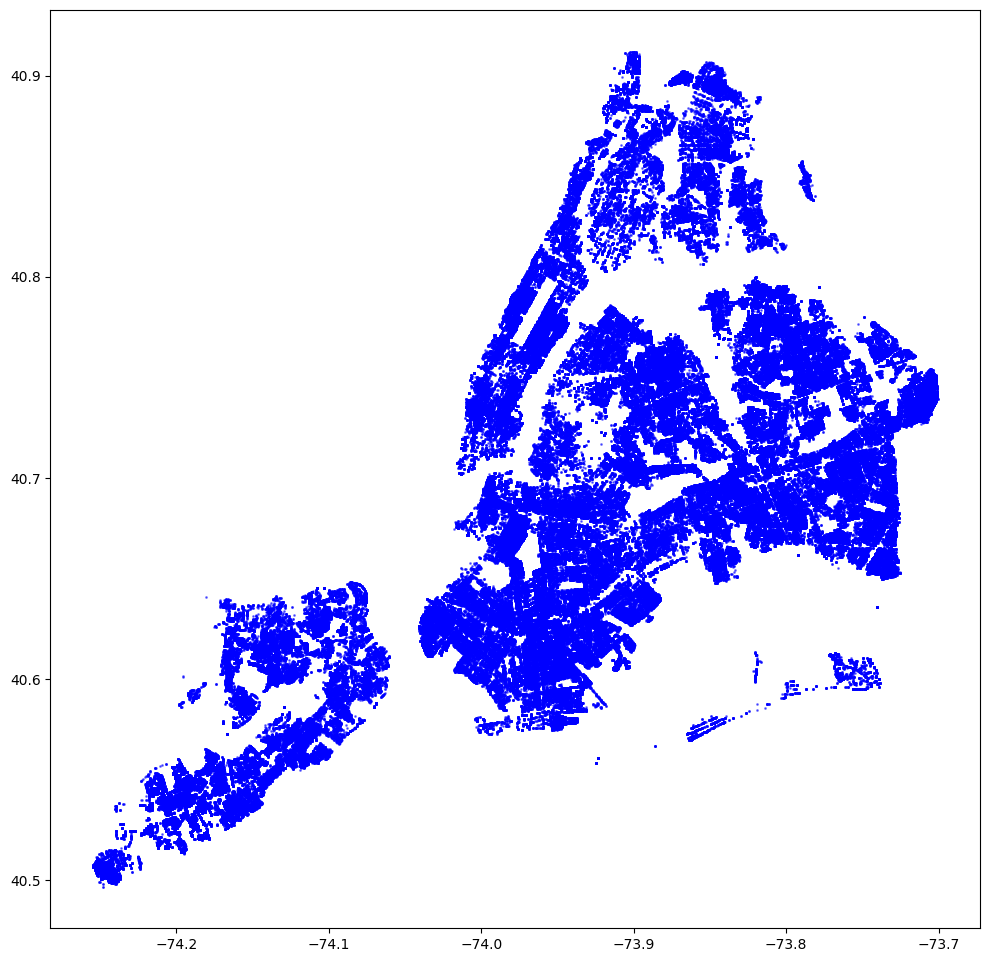

In [ ]:
gdf95.plot(
    figsize=(12, 12), 
    markersize=1, 
    color="blue", 
    alpha=0.5
)

<Axes: >

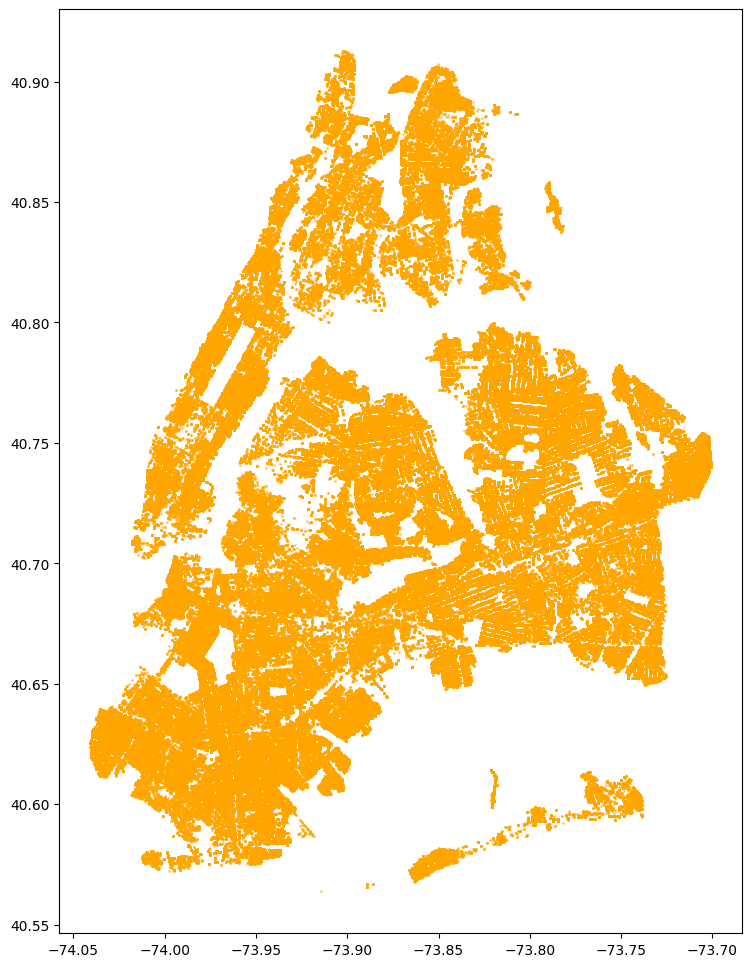

In [ ]:
gdf05.plot(
    figsize=(12, 12), 
    markersize=1, 
    color="orange", 
    alpha=0.5
)

<Axes: >

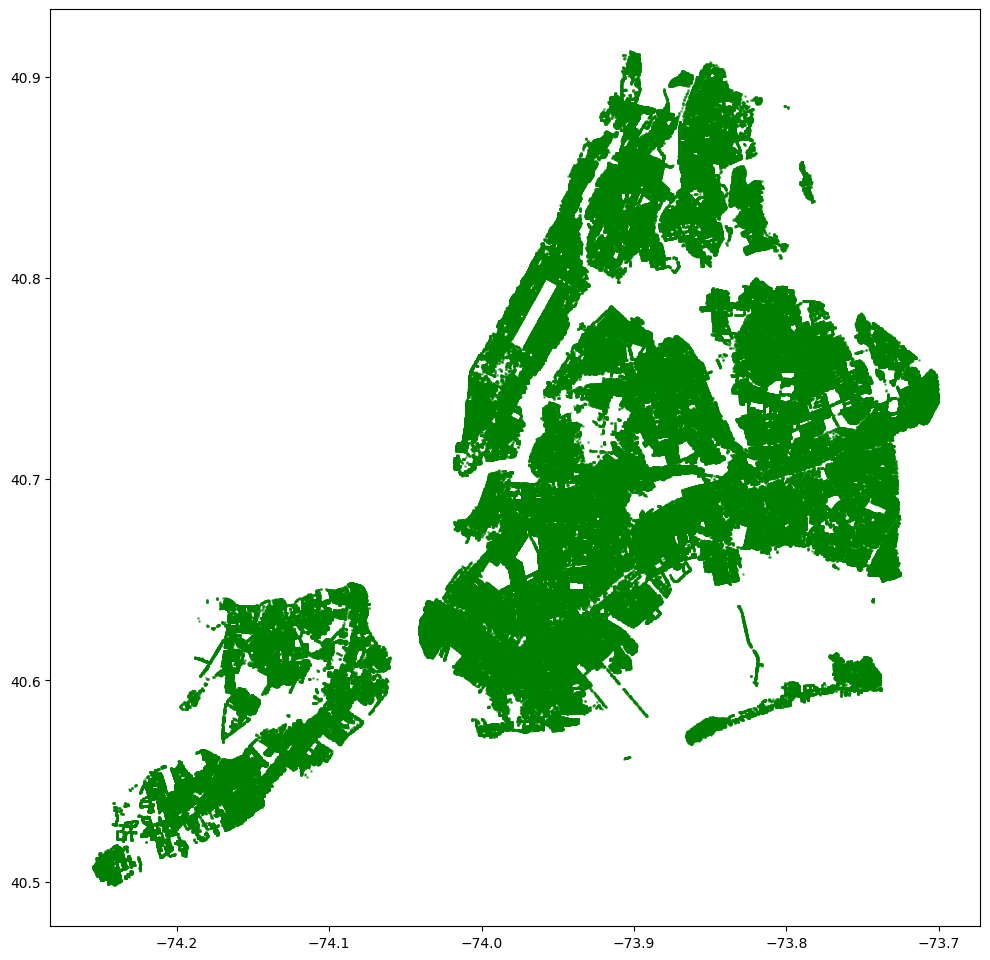

In [ ]:
gdf15.plot(
    figsize=(12, 12), 
    markersize=1, 
    color="green", 
    alpha=0.5
)